# Fantasy Premier League

## Budget

For the begining of the Season, managers are given a budget of 100M $. Then each player buy any combination of player not exceeding this limit.

In this notebook, we will study the patterns that appear in the budget strategy of top managers from the **2020-2021** FPL Season.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

In [2]:
import pandas as pd
import numpy as np
import glob
import os

path = '../../data/fpl_official/2020-21/season/processed/'

gk_value = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "gk_value_*.csv")))
gk_value = pd.concat(gk_value)
gk_value.sort_index(inplace=True)

def_value = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "def_value_*.csv")))
def_value = pd.concat(def_value)
def_value.sort_index(inplace=True)

mid_value = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "mid_value_*.csv")))
mid_value = pd.concat(mid_value)
mid_value.sort_index(inplace=True)

fwd_value = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "fwd_value_*.csv")))
fwd_value = pd.concat(fwd_value)
fwd_value.sort_index(inplace=True)

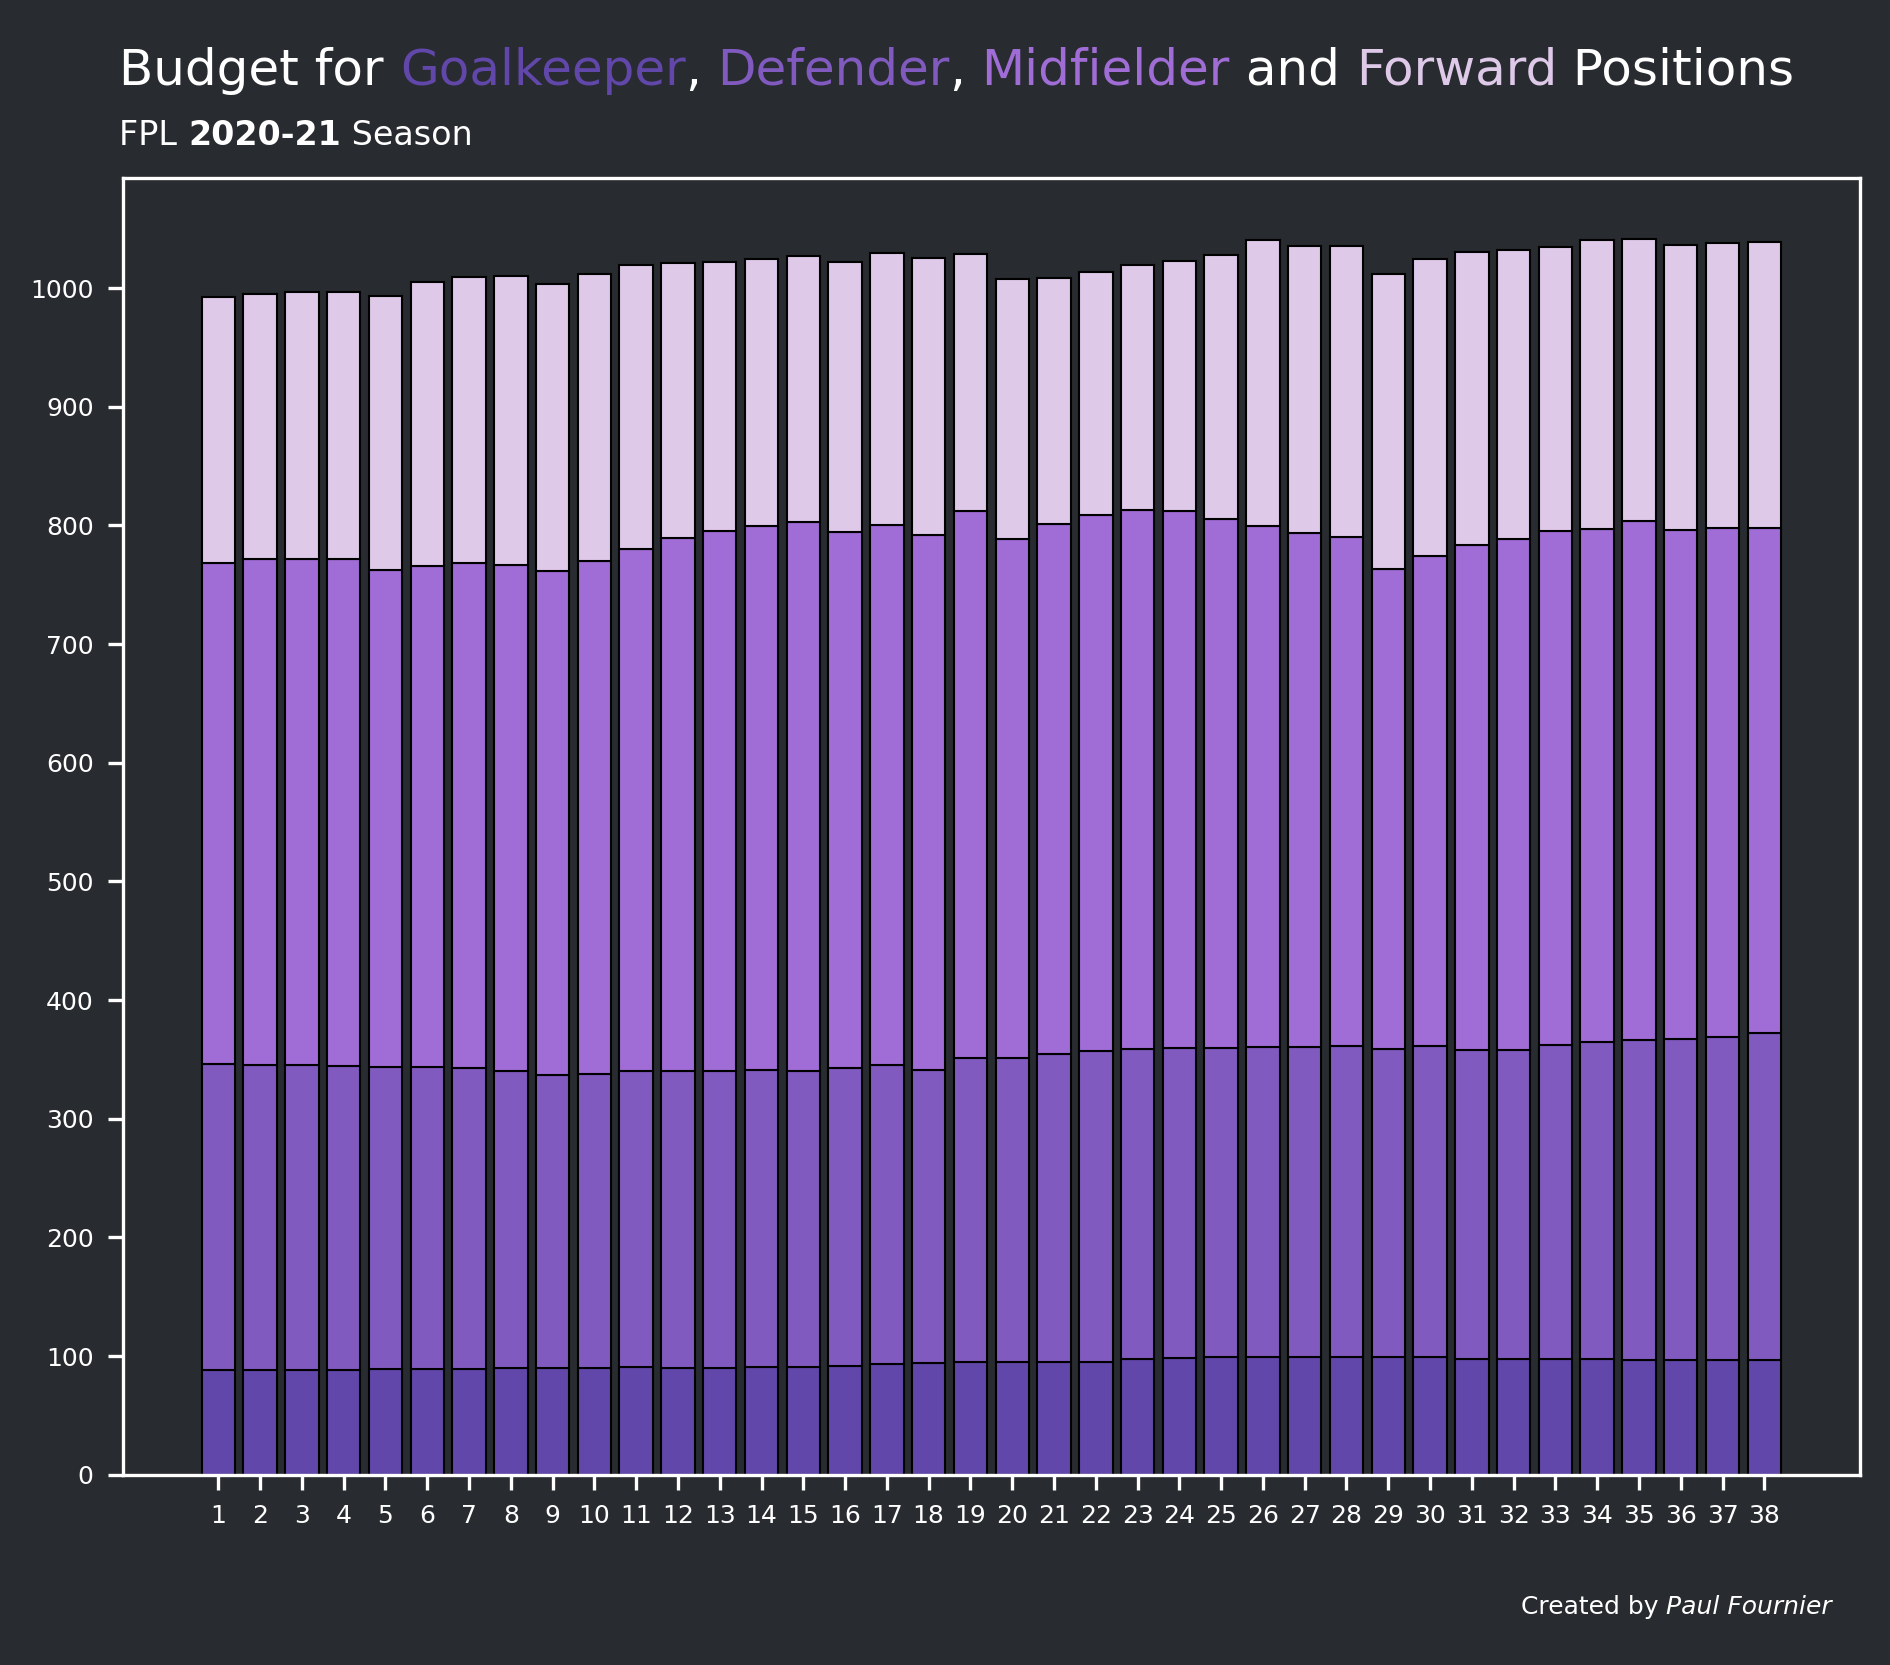

In [3]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

gk, defender, mid, fwd = [], [], [], []

for gw in range(1, 39):
    gk.append(np.mean(gk_value.loc[:, str(gw)]))
    defender.append(np.mean(def_value.loc[:, str(gw)]))
    mid.append(np.mean(mid_value.loc[:, str(gw)]))
    fwd.append(np.mean(fwd_value.loc[:, str(gw)]))

ax.bar(
    np.arange(1, 39), gk,
    color='#6247aa', edgecolor='black', linewidth=0.5)
bottom_y = np.array(gk)

ax.bar(
    np.arange(1, 39), defender,
    color='#815ac0', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(defender)

ax.bar(
    np.arange(1, 39), mid,
    color='#a06cd5', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(mid)

ax.bar(
    np.arange(1, 39), fwd,
    color='#dec9e9', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)

ax.set_xticks(np.arange(1, 39), minor=False)
ax.set_yticks(np.arange(0, 1010, 100), minor=False)

fig_text(
    x=0.07, y=1.06,
    s="Budget for <Goalkeeper>, <Defender>, <Midfielder> and <Forward> Positions",
    highlight_textprops=[
        {"color": '#6247aa'},
        {"color": '#815ac0'},
        {"color": '#a06cd5'},
        {"color": '#dec9e9'},
        ],
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.07, y=1.01,
    s="FPL <2020-21> Season",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=8, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.015,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

This graph shows an interesting tendency. More than **65%** of the budget is spent on the *Midfielders* and *Forward* (who make up 8 out of 15 of the entire team).

In [4]:
team_value = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "team_value_*.csv")))
team_value = pd.concat(team_value)
team_value.sort_index(inplace=True)

gk_percent = gk_value / team_value
def_percent = def_value / team_value
mid_percent = mid_value / team_value
fwd_percent = fwd_value / team_value

In [5]:
gk_percent_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])

for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        gk_percent_display.loc[row, col] = np.mean(
            np.mean(gk_percent[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))*100

gk_value_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])

for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        gk_value_display.loc[row, col] = np.mean(
            np.mean(gk_value[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))

gk_percent_display, gk_value_display

(           1st QT    2nd QT    3rd QT    4th QT
 Top10K   8.744449  8.746388  9.429408  9.290537
 Top25K   8.806041  8.799557  9.388695  9.400495
 Top100K  8.895575  8.872349  9.387842   9.49413,
             1st QT     2nd QT     3rd QT     4th QT
 Top10K   87.503286  89.425714  96.460222  96.869667
 Top25K   87.973648   89.66979  95.798548   97.29695
 Top100K  88.796265  90.299256  95.682928  97.908657)

First bit of insight we can draw from the data is that the higher the rank the lower the budget alloted towards buying goalkeepers. In the first few gameweeks of the season, the cocensus amongst managers is to spend less than 9M on goalkeeps.

In [6]:
def_percent_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        def_percent_display.loc[row, col] = np.mean(
            np.mean(def_percent[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))*100

def_value_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        def_value_display.loc[row, col] = np.mean(
            np.mean(def_value[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))

def_percent_display, def_value_display

(            1st QT     2nd QT     3rd QT     4th QT
 Top10K   25.713267  24.655222  25.421906  25.575741
 Top25K   25.659514  24.470346  25.268614  25.658638
 Top100K    25.5997   24.46423  25.212164  25.713721,
              1st QT      2nd QT      3rd QT      4th QT
 Top10K   257.295286  252.097571  260.048111  266.743917
 Top25K   256.323057  249.363705  257.816852  265.630883
 Top100K  255.523321  248.994143  256.962488  265.227803)

Now here we can see some very interesting data. Defenders make a bigger chunk of the budget for better ranked managers.

In [7]:
mid_percent_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        mid_percent_display.loc[row, col] = np.mean(
            np.mean(mid_percent[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))*100

mid_value_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        mid_value_display.loc[row, col] = np.mean(
            np.mean(mid_value[[str(gw) for gw in np.arange(
                gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))

mid_percent_display, mid_value_display

(            1st QT     2nd QT     3rd QT     4th QT
 Top10K   42.419818   44.34397   44.27345  41.764534
 Top25K   42.456339  44.051519  44.265335  41.437372
 Top100K  42.456673  43.684383   44.12534  41.228976,
              1st QT      2nd QT      3rd QT      4th QT
 Top10K   424.552286  453.639286  453.287333   435.90575
 Top25K   424.226048  449.097714  451.992956  429.288311
 Top100K  423.903328  444.808392  450.071244  425.547381)

Now we cannot draw very interesting insights. Most managers seem to spend their budget the same way throughout the season for the Midfield positions.

In [8]:
fwd_percent_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        fwd_percent_display.loc[row, col] = np.mean(
            np.mean(fwd_percent[[str(gw) for gw in np.arange(gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))*100

fwd_value_display = pd.DataFrame(
    columns=["1st QT", "2nd QT", "3rd QT", "4th QT"],
    index=["Top10K", "Top25K", "Top100K"])
for row, rank_range in zip(
        ["Top10K", "Top25K", "Top100K"],
        [(0,1000), (10000,25000), (25000,100000)]):
    for col, gw_range in zip(
            ["1st QT", "2nd QT", "3rd QT", "4th QT"],
            [(1,8), (9, 16), (17, 26), (27, 39)]):
        fwd_value_display.loc[row, col] = np.mean(
            np.mean(fwd_value[[str(gw) for gw in np.arange(gw_range[0], gw_range[1])]].iloc[rank_range[0]:rank_range[1]], axis=1))

fwd_percent_display, fwd_value_display

(            1st QT     2nd QT     3rd QT     4th QT
 Top10K   23.122466   22.25442  20.875236  23.369188
 Top25K   23.058106  22.678579  21.077356  23.503495
 Top100K  22.994907  22.979038  21.274654  23.563172,
              1st QT      2nd QT      3rd QT      4th QT
 Top10K   231.442429  227.464714     213.686     243.691
 Top25K   230.418381  231.056686  215.196741  243.299706
 Top100K  229.600954  233.849499  216.963185  243.039307)

# Premium Value

A cheap Goalkeeper has a value below 4.5 and a premium one has value greater than 5.5.
A cheap Defender has a value below 5 and a premium one has value greater than 6.5.
A cheap Midfielder has a value below 6 and a premium one has value greater than 9.
A cheap Goalkeeper has a value below 6 and a premium one has value greater than 10.


In [9]:
gk_cheap = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "gk_cheap_*.csv")))
gk_cheap = pd.concat(gk_cheap)
gk_cheap.sort_index(inplace=True)

gk_premiums = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "gk_premiums_*.csv")))
gk_premiums = pd.concat(gk_premiums)
gk_premiums.sort_index(inplace=True)

def_cheap = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "def_cheap_*.csv")))
def_cheap = pd.concat(def_cheap)
def_cheap.sort_index(inplace=True)

def_premiums = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "def_premiums_*.csv")))
def_premiums = pd.concat(def_premiums)
def_premiums.sort_index(inplace=True)

mid_cheap = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "mid_cheap_*.csv")))
mid_cheap = pd.concat(mid_cheap)
mid_cheap.sort_index(inplace=True)

mid_premiums = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "mid_premiums_*.csv")))
mid_premiums = pd.concat(mid_premiums)
mid_premiums.sort_index(inplace=True)

fwd_cheap = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "fwd_cheap_*.csv")))
fwd_cheap = pd.concat(fwd_cheap)
fwd_cheap.sort_index(inplace=True)

fwd_premiums = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "fwd_premiums_*.csv")))
fwd_premiums = pd.concat(fwd_premiums)
fwd_premiums.sort_index(inplace=True)

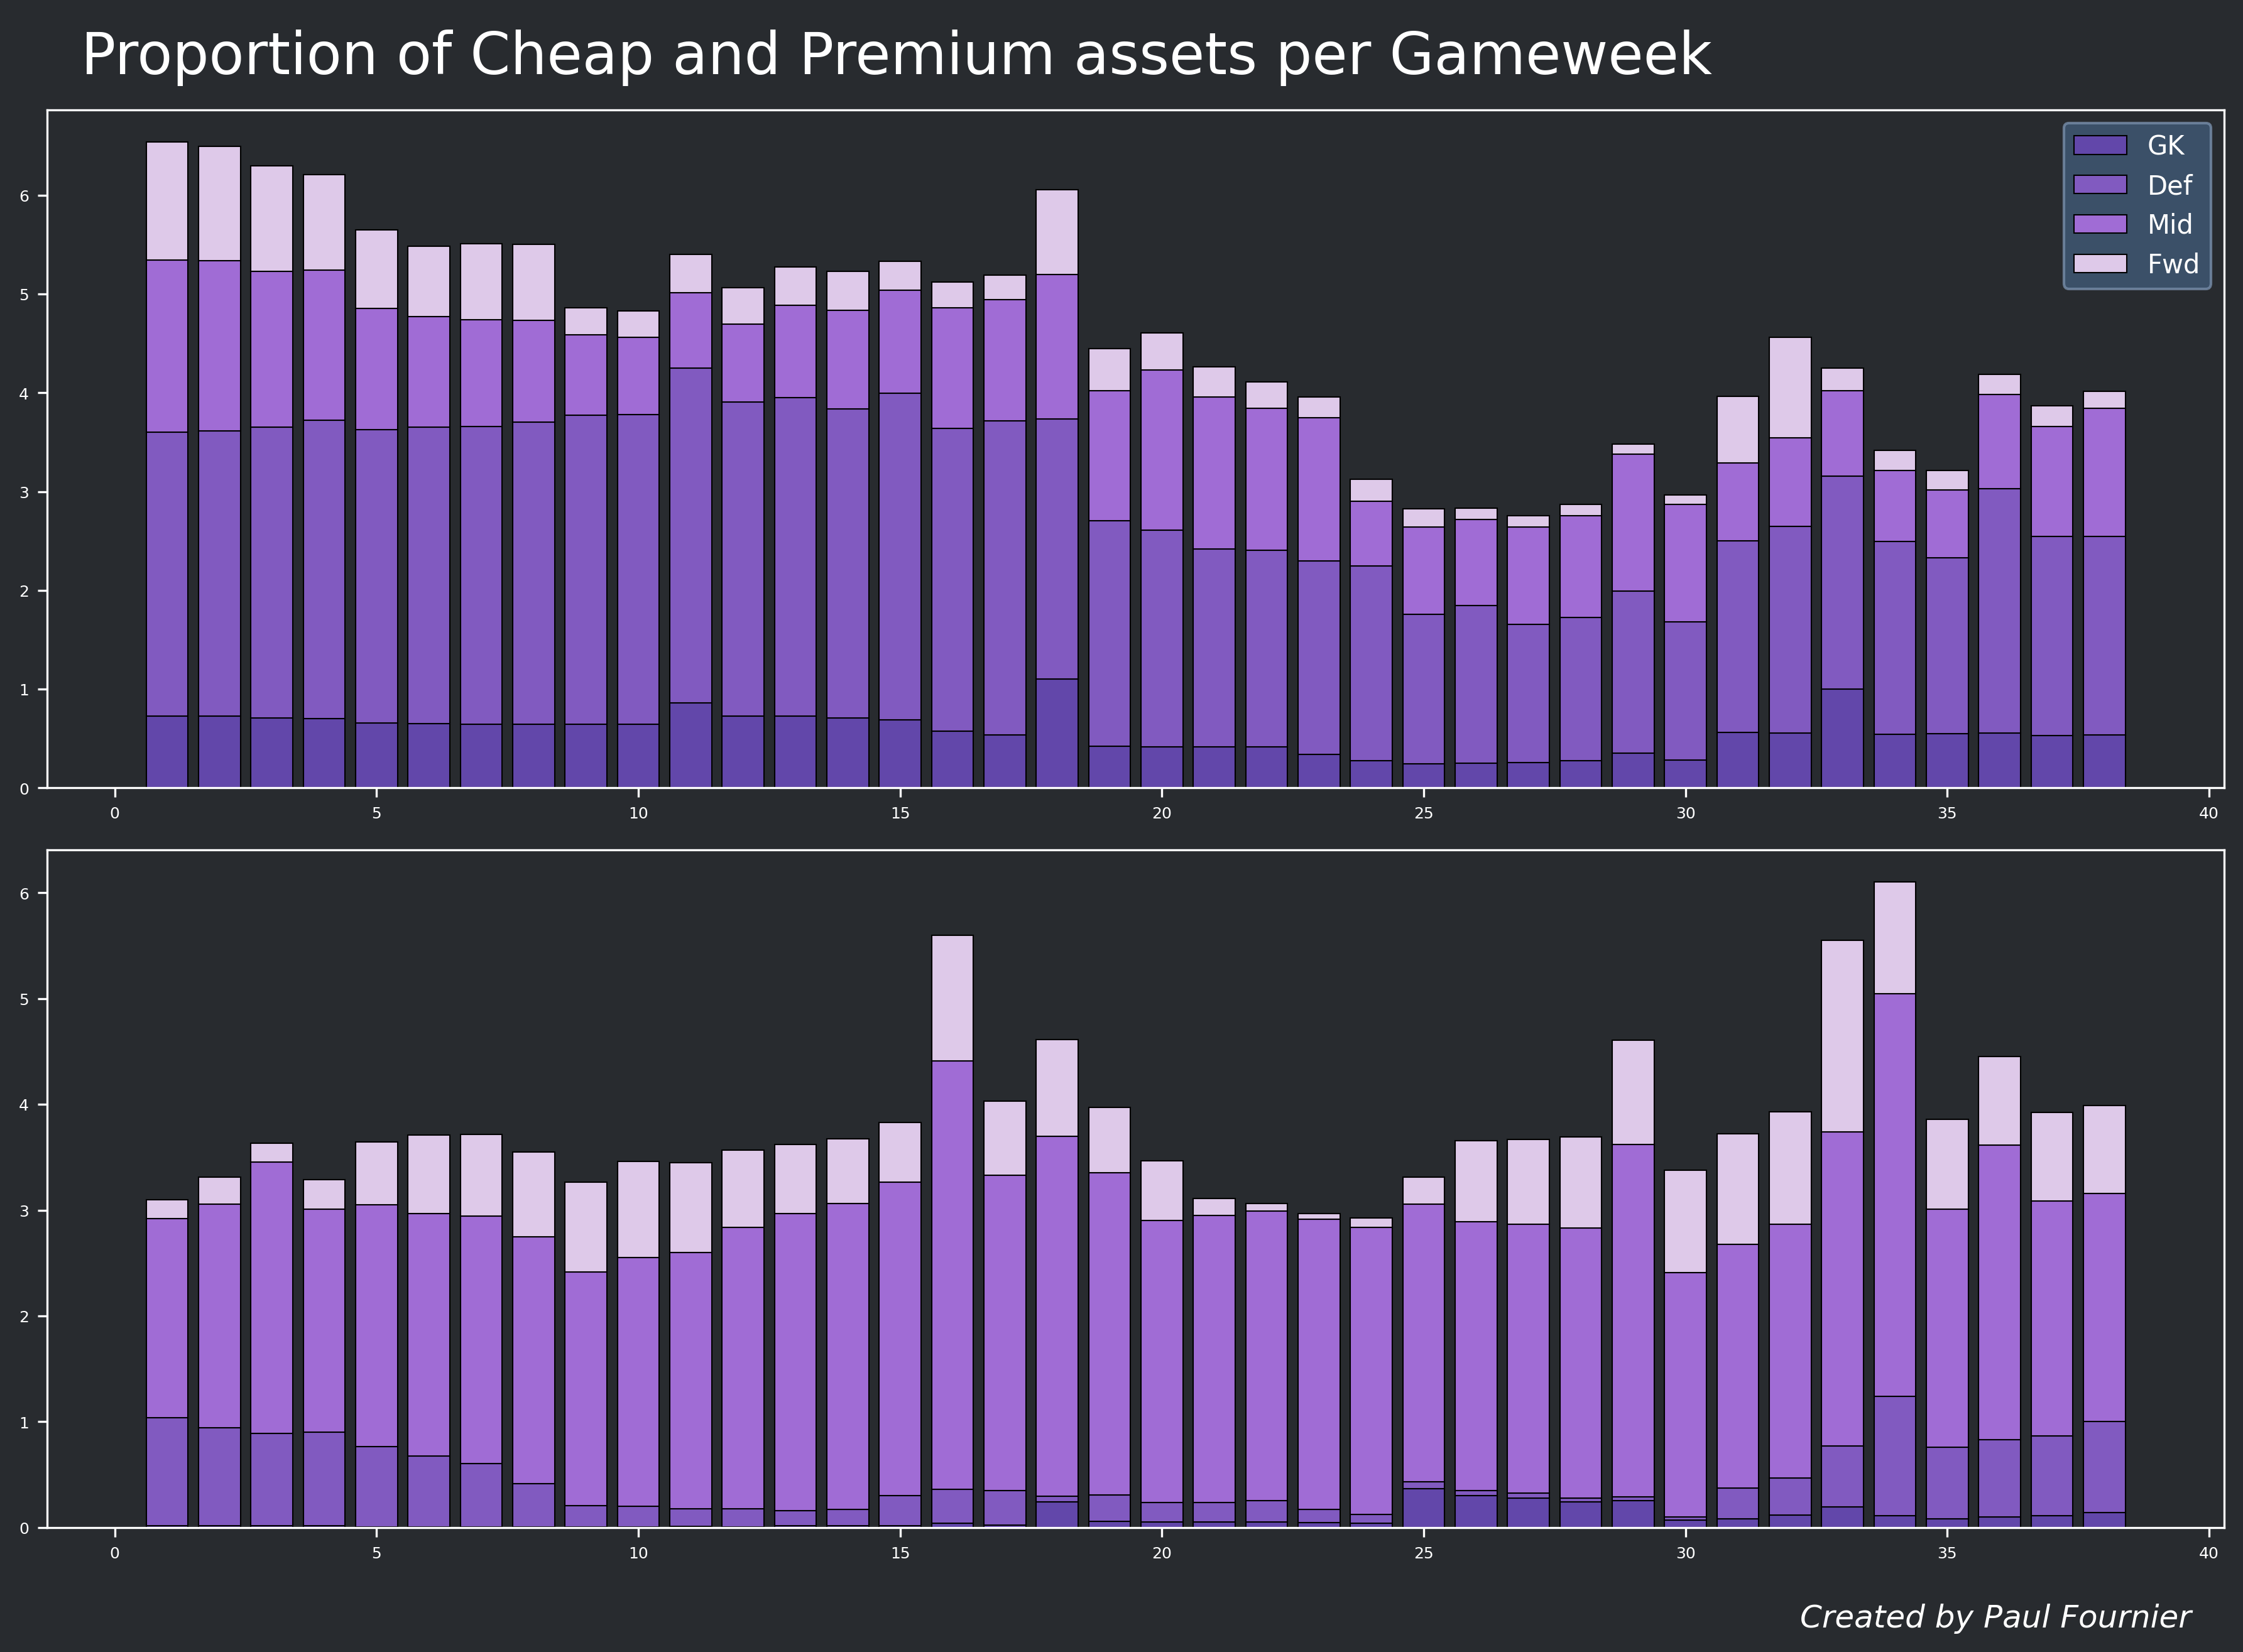

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
fig.set_facecolor(background)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)

gk, defender, mid, fwd = [], [], [], []

for gw in range(1, 39):
    gk.append(np.mean(gk_cheap.loc[:, str(gw)]))
    defender.append(np.mean(def_cheap.loc[:, str(gw)]))
    mid.append(np.mean(mid_cheap.loc[:, str(gw)]))
    fwd.append(np.mean(fwd_cheap.loc[:, str(gw)]))

axs[0].bar(
    np.arange(1, 39), gk,
    color='#6247aa', edgecolor='black', linewidth=0.5)
bottom_y = np.array(gk)

axs[0].bar(
    np.arange(1, 39), defender,
    color='#815ac0', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(defender)

axs[0].bar(
    np.arange(1, 39), mid,
    color='#a06cd5', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(mid)

axs[0].bar(
    np.arange(1, 39), fwd,
    color='#dec9e9', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)

legend = axs[0].legend(prop={'size': 10}, labels=['GK', 'Def', 'Mid', 'Fwd'], frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('#415A77')
frame.set_edgecolor('#778DA9')

gk, defender, mid, fwd = [], [], [], []

for gw in range(1, 39):
    gk.append(np.mean(gk_premiums.loc[:, str(gw)]))
    defender.append(np.mean(def_premiums.loc[:, str(gw)]))
    mid.append(np.mean(mid_premiums.loc[:, str(gw)]))
    fwd.append(np.mean(fwd_premiums.loc[:, str(gw)]))

axs[1].bar(
    np.arange(1, 39), gk,
    color='#6247aa', edgecolor='black', linewidth=0.5)
bottom_y = np.array(gk)

axs[1].bar(
    np.arange(1, 39), defender,
    color='#815ac0', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(defender)

axs[1].bar(
    np.arange(1, 39), mid,
    color='#a06cd5', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)
bottom_y += np.array(mid)

axs[1].bar(
    np.arange(1, 39), fwd,
    color='#dec9e9', edgecolor='black', linewidth=0.5,
    bottom=bottom_y)

fig_text(
    x=0.04, y=1.035,
    s="Proportion of Cheap and Premium assets per Gameweek",
    fontsize=22, fontfamily=title_font, color=text_color, alpha=1)

fig.text(
    0.8, -0.025, "Created by Paul Fournier", fontstyle="italic",
    fontsize=12, fontfamily=watermark_font, color=text_color)

plt.tight_layout()
plt.show()

# Bench value

In [11]:
bench_value = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "bench_value_*.csv")))
bench_value = pd.concat(bench_value)
bench_value.sort_index(inplace=True)

team_value = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "team_value_*.csv")))
team_value = pd.concat(team_value)
team_value.sort_index(inplace=True)

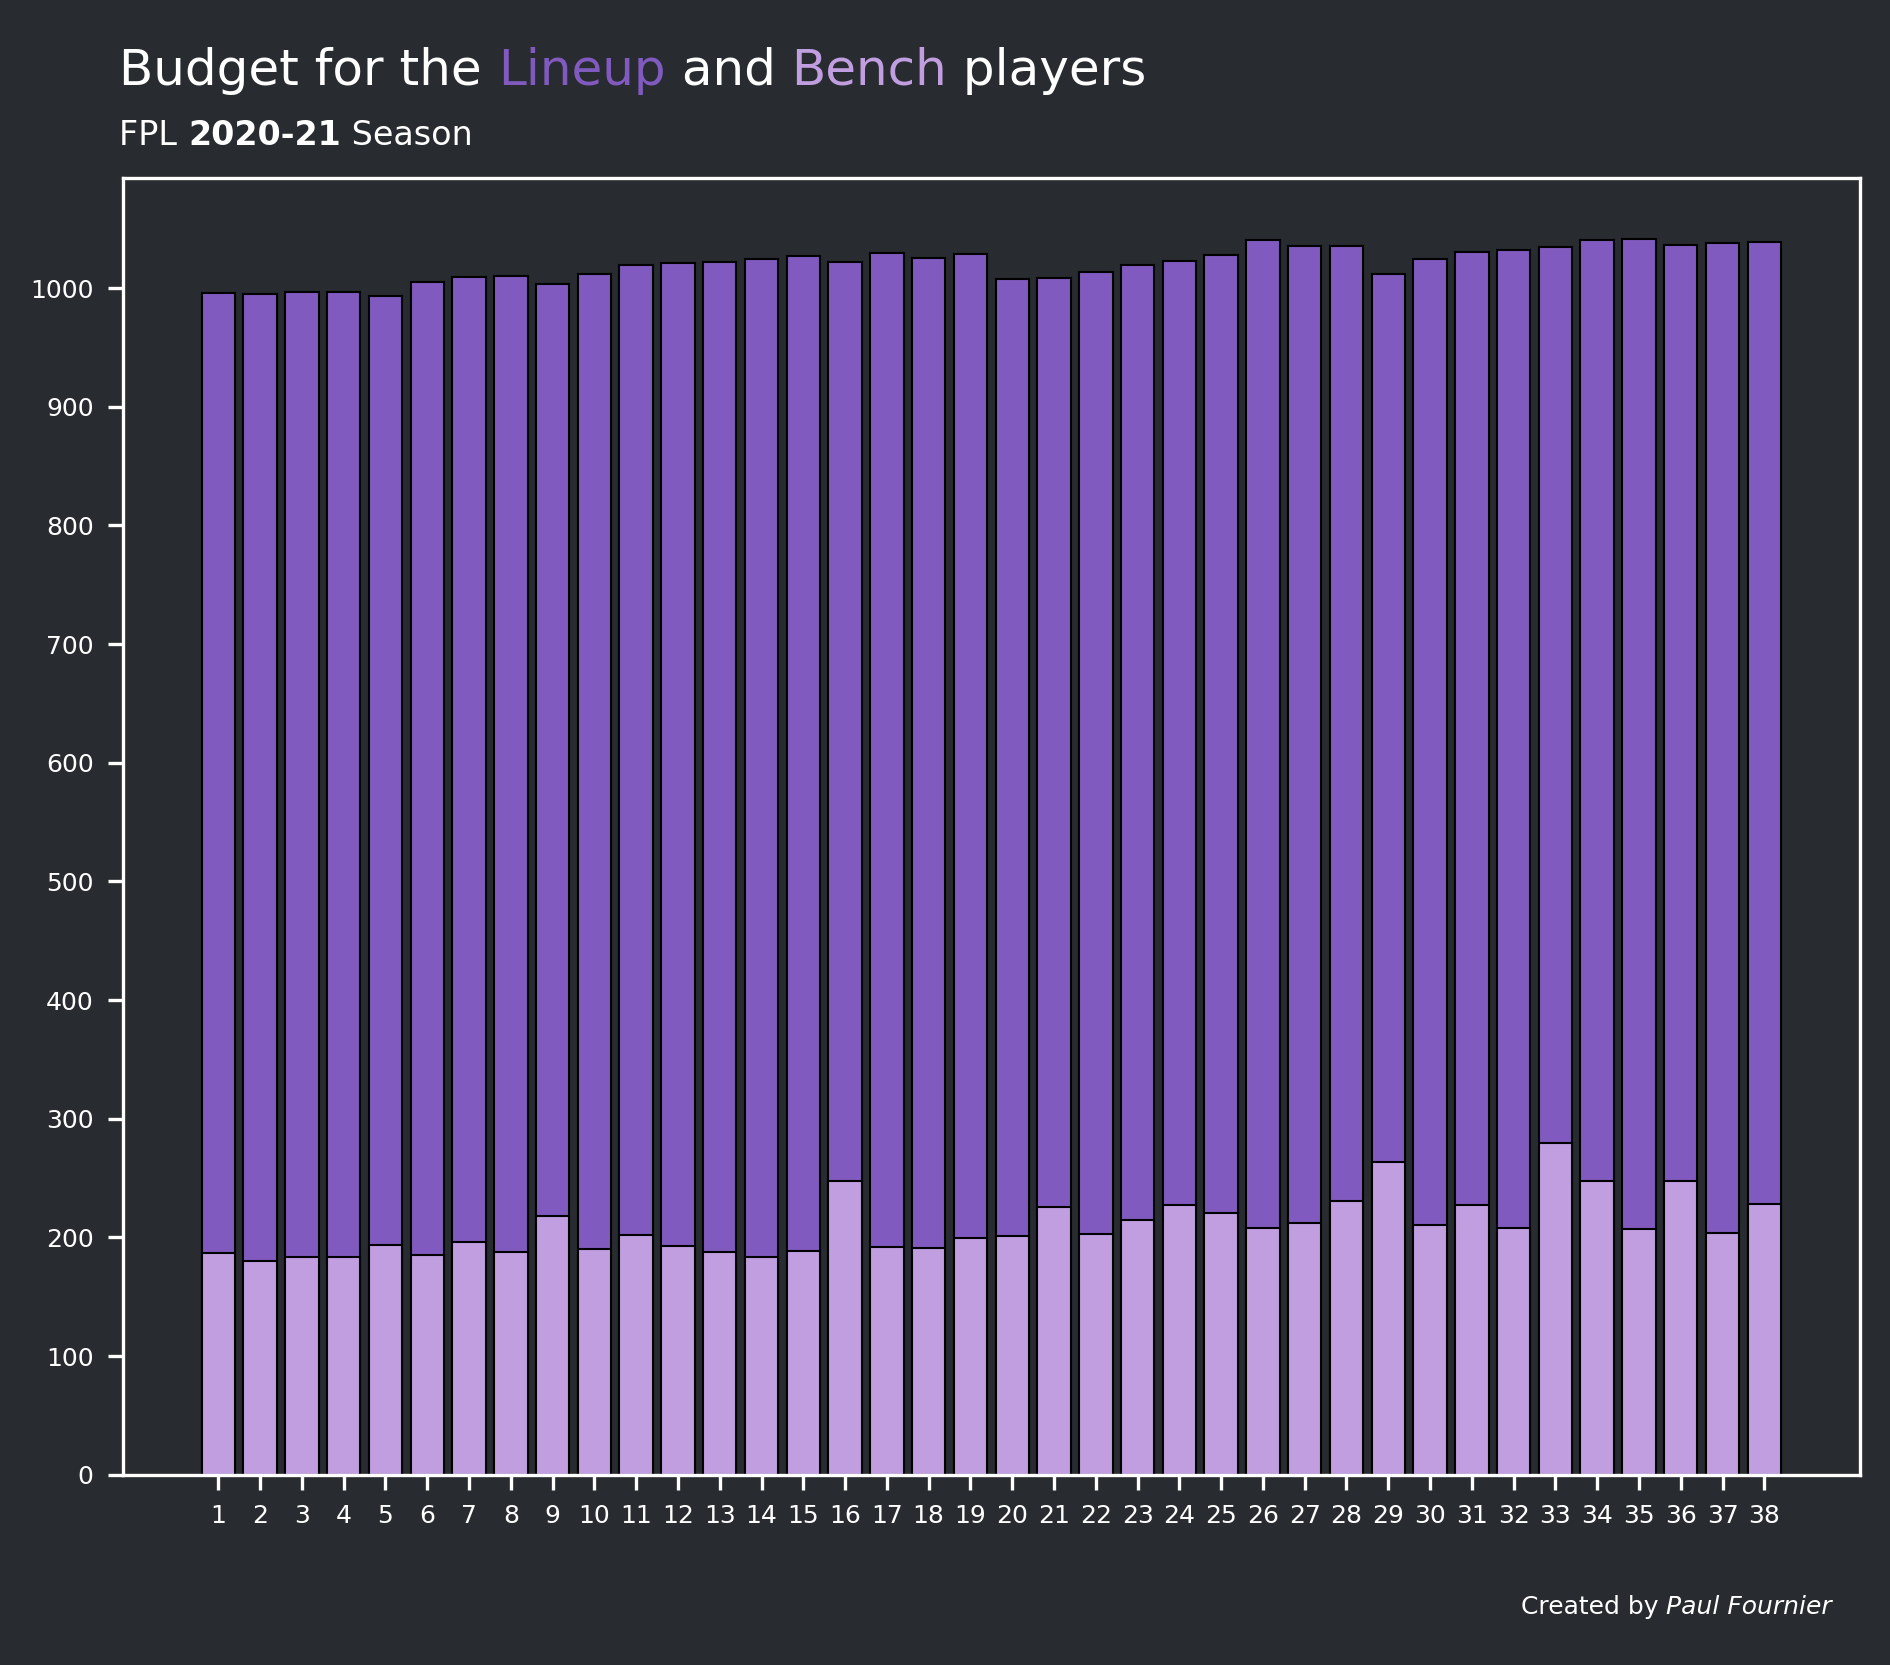

In [12]:
fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

lineup, bench = [], []

for gw in range(1, 39):
    lineup.append(np.mean(team_value.loc[:, str(gw)]))
    bench.append(np.mean(bench_value.loc[:, str(gw)]))

ax.bar(
    np.arange(1, 39), lineup,
    color='#815ac0', edgecolor='black', linewidth=0.5)
ax.bar(
    np.arange(1, 39), bench,
    color='#c19ee0', edgecolor='black', linewidth=0.5)

ax.set_xticks(np.arange(1, 39), minor=False)
ax.set_yticks(np.arange(0, 1010, 100), minor=False)

fig_text(x=0.07, y=1.06,
        s="Budget for the <Lineup> and <Bench> players",
        highlight_textprops=[
            {"color": '#815ac0'},
            {"color": '#c19ee0'},
            ],
        fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(x=0.07, y=1.01,
        s="FPL <2020-21> Season",
        highlight_textprops=[{"fontweight": "bold"}],
        fontsize=8, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.8, y=-0.015,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)
    
plt.show()

# In The Bank

In [13]:
in_the_bank = (
    pd.read_csv(f, index_col=0)
    for f in glob.glob(os.path.join(path, "in_the_bank_*.csv")))
in_the_bank = pd.concat(in_the_bank)
in_the_bank.sort_index(inplace=True)

In [14]:
in_the_bank_10k = in_the_bank.iloc[:10000][['1', '2', '3']]
in_the_bank_10k.describe().iloc[1:]

,1,2,3
mean,4.24050,7.910900,14.887200
std,6.81728,27.026117,39.720663
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,1.000000
50%,0.00000,1.000000,3.000000
75%,5.00000,9.000000,11.000000
max,65.00000,531.000000,601.000000


In [15]:
in_the_bank_25k = in_the_bank.iloc[10000:25000][['1', '2', '3']]
in_the_bank_25k.describe().iloc[1:]

,1,2,3
mean,4.316333,8.276467,15.674333
std,7.165963,27.959748,41.401375
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,1.000000,3.000000
75%,5.000000,9.000000,11.000000
max,80.000000,608.000000,636.000000


In [16]:
in_the_bank_50k = in_the_bank.iloc[25000:][['1', '2', '3']]
in_the_bank_50k.describe().iloc[1:]

,1,2,3
mean,4.55451,8.690570,17.150315
std,7.56708,26.765478,43.464887
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,0.00000,3.000000,3.000000
75%,5.00000,9.000000,12.000000
max,110.00000,601.000000,663.000000


Given the very noisy in the bank data, we only will analyse the first three GWs. The most interesting for me in the Gameweek 1 (i.e. the only one column that will have no noise). **The better the rank, the fewer money is kept in the bank.**